<div align="center">

# **CS-E4650 Methods of Data Mining**

# **Exercise 1.4 Homework: Curse of Dimensionality**

</div>

:<div align="center">
    
# **Group members**

# **Nguyen Xuan Binh (887799)**

# **Erald Shahinas (906845)**

# **Alexander Pavlyuk (906829)**

</div>

</br>
</br>
</br>

# **Table of Contents**

### 1. [Methods](#Methods)
### 2. [Relative Contrast](#Relative-Contrast)
### 3. [Minimum, Maximum and Mean Distances](#Minimum,-Maximum-and-Mean-Distances)
### 4. [Variance of Distance](#Variance-of-Distance)
### 5. [Extra Experiments (Optional)](#Extra-Experiments)
### 6. [Conclusions](#Conclusions)
### 7. [Appendix](#Appendix)

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

## **1. Methods**

All the calculations have been perfomed on JypyterHub (https://jupyter.cs.aalto.fi) in the Python notebook. Additionally, numpy (https://numpy.org/) and matplotlib (https://matplotlib.org/) libraries have been imported to handle specific functions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The key parameters are <br>

1.   dimensions: $k = [2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]$,
2.   the number of generated data sets: $q = 100$,
3.   the size of each data set: $n = 100$,
4.   and the norms for evaluating the distances: $norms = [0.5, 1, 2, 5, \infty]$.







In [ ]:
k_list = [2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
q = 100
n = 100
p_list = [0.5, 1, 2, 5, np.inf]

The five statistics to be calculated are

1.   minimum distance $D_{min}$,
2.   maximum distance $D_{max}$,
3.   mean distance $\mu$,
4.   variance of the distance $\sigma^2$,
5.   and relative contrast $Ctr=\frac{D_{max}-D_{min}}{D_{min}}$.

These statistics are calculated for all $q$ data sets using the custom Lp_norm function with


1.   $p=0.5$
2.   $p=1$
3.   $p=2$
4.   $p=5$
5.   $p=\infty$

The $L_p$-norm between two data points $\overline{X} = (x_1,...,x_d)$ and $\overline{Y} = (y_1,...,y_d)$ is defined as follows:

$$ Dist(\overline{X},\overline{Y}) = \left(\sum_{i=1}^d |x_i-y_i|^p \right)^{1/p} $$

In [ ]:
def Lp_norm(data2D, data1D, p):
    if p == np.inf:
        return np.max(np.abs(data2D - data1D), axis=1)
    else:
        return np.sum(np.abs(data2D - data1D)**p, axis=1)**(1/p)

The $q$ data sets of $n$ points are generated with the uniform distribution with the randomization interval [0, 1]. Numpy function *np.random.uniform()* is utilized.

After that, for all $k$ the means of the five statistics are calculated over all $q$ generated data sets:

1.   $Min(L_p)$
2.   $Max(L_p)$
3.   $Avg(L_p)$
4.   $Var(L_p)$
5.   $Ctr(L_p)$


In [ ]:
D_min = {}
D_max = {}
D_mean = {}
D_var = {}
Ctr = {}

for p in p_list:
    D_min_dim = []
    D_max_dim = []
    mean_dist_dim = []
    var_dist_dim = []
    Ctr_dim = []
    for k in k_list:
        D_min_list = []
        D_max_list = []
        mean_dist_list = []
        var_dist_list = []
        Ctr_list = []
        for _ in range(q):
            data2D = np.random.uniform(0, 1, size=(n, k))
            data1D = np.zeros(k)
            #lp_norm = np.linalg.norm(data2D - data1D, ord=p, axis = 1)
            lp_norm = Lp_norm(data2D, data1D, p)

            D_min_dist = np.min(lp_norm)
            D_max_dist = np.max(lp_norm)
            mean_distance = np.mean(lp_norm)
            variance_distance = np.var(lp_norm)
            Ctr_value = (D_max_dist - D_min_dist) / D_min_dist

            D_min_list.append(D_min_dist)
            D_max_list.append(D_max_dist)
            mean_dist_list.append(mean_distance)
            var_dist_list.append(variance_distance)
            Ctr_list.append(Ctr_value)
        D_min_dim.append(np.mean(D_min_list))
        D_max_dim.append(np.mean(D_max_list))
        mean_dist_dim.append(np.mean(mean_dist_list))
        var_dist_dim.append(np.mean(var_dist_list))
        Ctr_dim.append(np.mean(Ctr_list))

    D_min[p] = D_min_dim
    D_max[p] = D_max_dim
    D_mean[p] = mean_dist_dim
    D_var[p] = var_dist_dim
    Ctr[p] = Ctr_dim

## **2. Relative Contrast**

All relative contrasts $Ctr(L_p)$ are plotted as a function of $k$. The second plot is a scaled version of the first one.

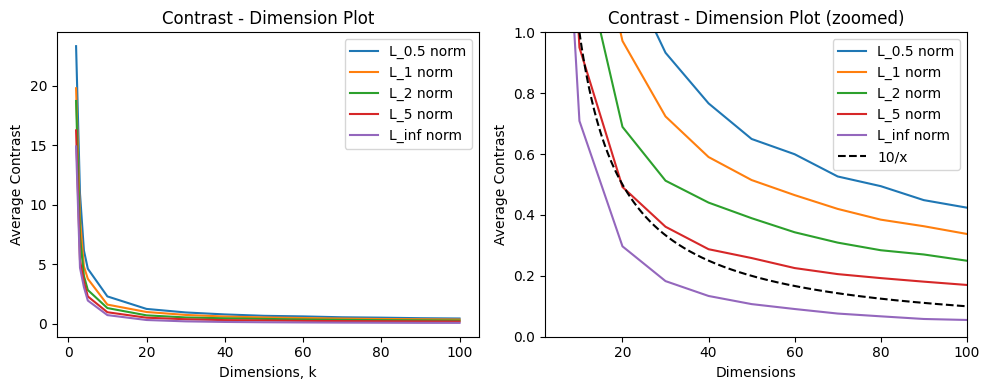

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))



for p, Ctr_list in Ctr.items():
    ax1.plot(k_list, Ctr_list, label=f"L_{p} norm")
    ax2.plot(k_list, Ctr_list, label=f"L_{p} norm")

x = np.linspace(0.1, 100, 1000)
ax2.plot(x, 10/np.array(x), linestyle="--", color='k', label = "10/x")

ax1.set_xlabel('Dimensions, k')
ax1.set_ylabel('Average Contrast')
ax1.set_title('Contrast - Dimension Plot')
ax1.legend()

ax2.set_xlabel('Dimensions')
ax2.set_ylabel('Average Contrast')
ax2.set_xlim(2, 100)
ax2.set_ylim(0, 1)
ax2.set_title('Contrast - Dimension Plot (zoomed)')
ax2.legend()


# Show the plot
plt.tight_layout()
plt.show()




__Conclusion:__

What is happening when k increases?
*   All contrast functions decrease and converge to zero with k increases;

When Ctr drops below 1?
*   average contrast of $L_{0.5}$ drops below 1 at $k>=30$;
*   average contrast of $L_{1}$ drops below 1 at $k>=20$;
*   average contrast of $L_{2}$ drops below 1 at $k>=20$;
*   average contrast of $L_{5}$ drops below 1 at $k>=10$;
*   average contrast of $L_{\infty}$ drops below 1 at $k>=10$;
*   $p$-value affects the speed of convergence of $Ctr(L_p)$ function.

What is the effect of $p$ in different $L_p$ measures?
*   The larger $p$ becomes, the more rapidly the relative contrast diminishes (or converges).

If a curve seems to be converging, tell also the value that it is approaching.
*  A curve is converging in the shape of multiplicative inverse function as indicated in the figure (Such as $10/x$). The value that relative contrast is approaching is $0$


## **3. Minimum, Maximum and Mean Distances**

The minimum ($Min(L_p)$), maximum($Max(L_p)$), and mean ($Avg(L_p)$) distances for each $L_p$ are plotted as functions of $k$. The plots of $L_2$, $L_5$, and $L_{\infty}$ have the same scale.

Last value of D_mean of L_0.5: 4444.868136129771
Last value of D_mean of L_1: 50.00147765587612
Last value of D_mean of L_2: 5.768119791511815
Last value of D_mean of L_5: 1.7525277950736051
Last value of D_mean of L_inf: 0.9899637748230639


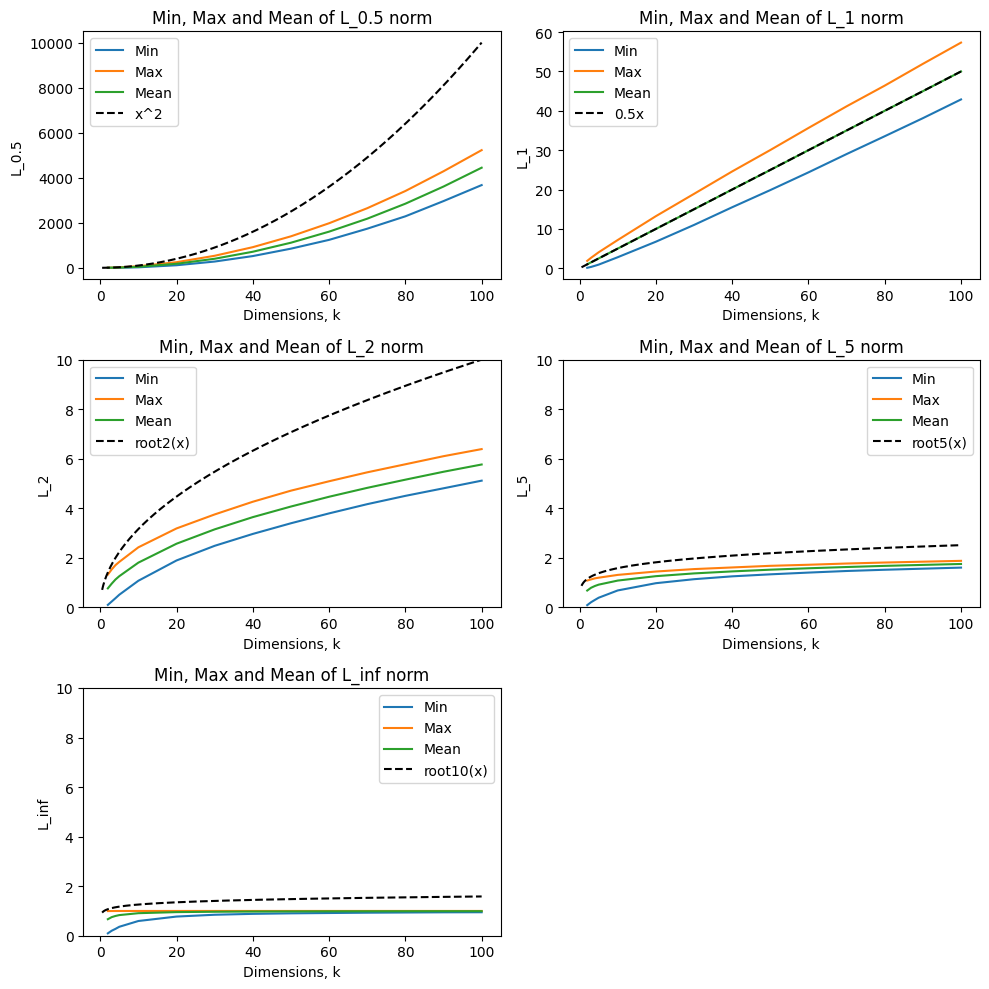

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

graph_indices = [(0, 0), (0,1), (1, 0), (1,1), (2,0)]

for index, p in enumerate(p_list):
    row, column = graph_indices[index]
    axes[row, column].plot(k_list, D_min[p], label="Min")
    axes[row, column].plot(k_list, D_max[p], label="Max" )
    axes[row, column].plot(k_list, D_mean[p], label="Mean")


    print(f"Last value of D_mean of L_{p}: {D_mean[p][-1]}")

    axes[row, column].set_xlabel('Dimensions, k')
    axes[row, column].set_ylabel("L_" + str(p))
    axes[row, column].set_title("Min, Max and Mean of L_" + str(p) + " norm")
    #axes[row, column].legend()



x = np.linspace(0.5, 100, 1000)
axes[0,0].plot(x, x**2, linestyle="--", color='k', label = "x^2")
axes[0,0].legend()

axes[0,1].plot(x, 0.5 * x, linestyle="--", color='k', label = "0.5x")
axes[0,1].legend()

axes[1,0].plot(x, x ** 0.5, linestyle="--", color='k', label = "root2(x)")
axes[1,0].legend()

axes[1,1].plot(x, x ** 0.2, linestyle="--", color='k', label = "root5(x)")
axes[1,1].legend()

axes[2,0].plot(x, x ** 0.1, linestyle="--", color='k', label = "root10(x)")
axes[2,0].legend()

# Same scale for plots of L2, L5 and L∞
axes[1, 0].set_ylim(0, 10)
axes[1, 1].set_ylim(0, 10)
axes[2, 0].set_ylim(0, 10)

# Show the plots
axes[2, 1].axis('off')
plt.tight_layout()
plt.show()



__Conclusion:__

How the curves are behaving when k increases?:
*   all $Min(L_{p})$, $Max(L_{p})$, and $Avg(L_{p})$ functions grows/converges when $k$ increases;

Can you characterize the form of curves?
*   $Min(L_{0.5})$, $Max(L_{0.5})$, and $Avg(L_{0.5})$ functions have the parabolic form $ak^2$;
*   $Min(L_{1})$, $Max(L_{1})$, and $Avg(L_{1})$ functions have the linear form $ak$;
*   $Min(L_{2})$, $Max(L_{2})$, and $Avg(L_{2})$ functions have root form $\sqrt[2]{k}$;
*   $Min(L_{5})$, $Max(L_{5})$, and $Avg(L_{5})$ functions have root form $\sqrt[5]{k}$;
*   $Min(L_{inf})$, $Max(L_{inf})$, and $Avg(L_{inf})$ functions have root form $\sqrt[\infty]{k}$;

If a curve seems to be converging, tell also the value that it is approaching.
*   $Min(L_{0.5})$, $Max(L_{0.5})$, and $Avg(L_{0.5})$ functions do not converge;
*   $Min(L_{1})$, $Max(L_{1})$, and $Avg(L_{1})$ functions do not converge;
*   $Min(L_{2})$, $Max(L_{2})$, and $Avg(L_{2})$ functions seem to not converge;
*   $Min(L_{5})$, $Max(L_{5})$, and $Avg(L_{5})$ functions converges to $1.75$;
*   $Min(L_{\infty})$, $Max(L_{\infty})$, and $Avg(L_{\infty})$ functions converge to $1$;

What is the effect of p?:
*   $p$-value directly affects the form of $Min(L_{p})$, $Max(L_{p})$, and $Avg(L_{p})$ with the parametric function $a * x^{\frac{1}{p}}$.

## **4. Variance of Distance**

 The variances $Var(L_p)$ are plotted as functions of $k$. The last plot containes $Var(L_2)$, $Var(L_5)$, and $Var(L_{\infty})$ functions together.

Last value of D_var of L_0.5: 97828.55237972685
Last value of D_var of L_1: 8.25782219294727
Last value of D_var of L_2: 0.06524617722443743
Last value of D_var of L_5: 0.0028350870061236238
Last value of D_var of L_inf: 9.884913014274746e-05


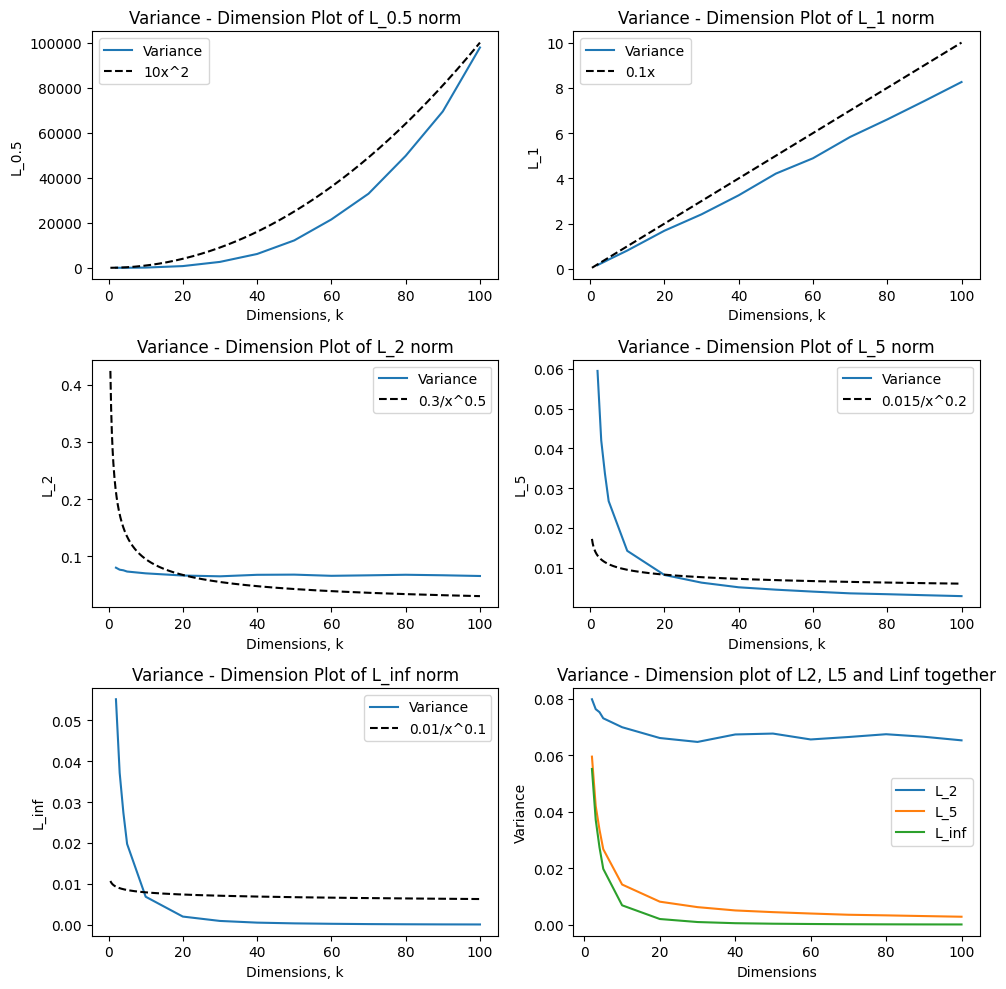

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

graph_indices = [(0, 0), (0,1), (1, 0), (1,1), (2,0)]

for index, p in enumerate(p_list):
    row, column = graph_indices[index]
    print(f"Last value of D_var of L_{p}: {D_var[p][-1]}")
    axes[row, column].plot(k_list, D_var[p], label="Variance")
    axes[row, column].set_xlabel('Dimensions, k')
    axes[row, column].set_ylabel("L_" + str(p))
    axes[row, column].set_title("Variance - Dimension Plot of L_" + str(p) + " norm")


# Show L2, L5 and L∞ norms on the same plot
x = np.linspace(0.5, 100, 1000)

axes[0,0].plot(x, 10 * x ** 2, linestyle="--", color='k', label = "10x^2")
axes[0,0].legend()

axes[0,1].plot(x, 0.1 * x, linestyle="--", color='k', label = "0.1x")
axes[0,1].legend()

axes[1,0].plot(x, 0.3 * (1/x**(0.5)), linestyle="--", color='k', label = "0.3/x^0.5")
axes[1,0].legend()

axes[1,1].plot(x, 0.015 * (1/x**(0.2)), linestyle="--", color='k', label = "0.015/x^0.2")
axes[1,1].legend()

axes[2,0].plot(x, 0.01 * (1/x**(0.1)), linestyle="--", color='k', label = "0.01/x^0.1")
axes[2,0].legend()

axes[2, 1].plot(k_list, D_var[2], label="L_2")
axes[2, 1].plot(k_list, D_var[5], label="L_5")
axes[2, 1].plot(k_list, D_var[np.inf], label="L_inf")
axes[2, 1].set_xlabel('Dimensions')
axes[2, 1].set_ylabel("Variance")
axes[2, 1].set_title("Variance - Dimension plot of L2, L5 and Linf together")
axes[2, 1].legend()

# Show the plot
plt.tight_layout()
plt.show()





__Conclusion:__

How the curves are behaving when k increases?:
*   $Var(L_{0.5})$ and $Var(L_1)$ functions grow with $k$ increases;
*   $Var(L_2)$, $Var(L_5)$, and $Var(L_{\infty})$ functions decrease and converge to some value with $k$ increases;

Can you characterize the form of curves?:
*   $Var(L_{0.5})$ function has the parabolic form $ak^2$;
*   $Var(L_{1})$ function has the linear form $ak$;
*   $Var(L_{2})$, $Var(L_{5})$, and $Var(L_{\infty})$ functions have the multiplicative inverse  $\frac{a}{x}$;

If a curve seems to be converging, tell also the value that it is approaching?:
*   $Var(L_{0.5})$ and $Var(L_{1})$ functions do not converge
*   $Var(L_2)$ function converges to $\approx0.065$;
*   $Var(L_5)$ and $Var(L_{\infty})$ functions converge to $0$.

What is the effect of p?
* if $p \leq 1$, the variance has the form $ax^{\frac{1}{p}}$
* if $p > 1$, the variance has the form $ax^{-\frac{1}{p}}$


## **5. Extra Experiments (Optional)**

In the extra experiments, we used more data to verify the claims we made above:

The number of dimensions $k$ increased to at max $1000$.

The number of data sets $q$ increased to $200$.

The dataset size $n$ increased to $200$.


In [ ]:
def Lp_norm(data2D, data1D, p):
    if p == np.inf:
        return np.max(np.abs(data2D - data1D), axis=1)
    else:
        return np.sum(np.abs(data2D - data1D)**p, axis=1)**(1/p)

k_list_exp = range(50, 1001, 50)
q_exp = 200
n_exp = 200
p_list = [0.5, 1, 2, 5, np.inf]

D_min = {}
D_max = {}
D_mean = {}
D_var = {}
Ctr = {}

for p in p_list:
    D_min_dim = []
    D_max_dim = []
    mean_dist_dim = []
    var_dist_dim = []
    Ctr_dim = []
    for k in k_list_exp:
        D_min_list = []
        D_max_list = []
        mean_dist_list = []
        var_dist_list = []
        Ctr_list = []
        for _ in range(q_exp):
            data2D = np.random.uniform(0, 1, size=(n_exp, k))
            data1D = np.zeros(k)
            #lp_norm = np.linalg.norm(data2D - data1D, ord=p, axis = 1)
            lp_norm = Lp_norm(data2D, data1D, p)

            D_min_dist = np.min(lp_norm)
            D_max_dist = np.max(lp_norm)
            mean_distance = np.mean(lp_norm)
            variance_distance = np.var(lp_norm)
            Ctr_value = (D_max_dist - D_min_dist) / D_min_dist

            D_min_list.append(D_min_dist)
            D_max_list.append(D_max_dist)
            mean_dist_list.append(mean_distance)
            var_dist_list.append(variance_distance)
            Ctr_list.append(Ctr_value)
        D_min_dim.append(np.mean(D_min_list))
        D_max_dim.append(np.mean(D_max_list))
        mean_dist_dim.append(np.mean(mean_dist_list))
        var_dist_dim.append(np.mean(var_dist_list))
        Ctr_dim.append(np.mean(Ctr_list))

    D_min[p] = D_min_dim
    D_max[p] = D_max_dim
    D_mean[p] = mean_dist_dim
    D_var[p] = var_dist_dim
    Ctr[p] = Ctr_dim

Last value of D_mean of L_0.5: 444557.1975795598
Last value of D_mean of L_1: 500.0323232123855
Last value of D_mean of L_2: 18.254311189583532
Last value of D_mean of L_5: 2.7817739857391808
Last value of D_mean of L_inf: 0.9990036078427355


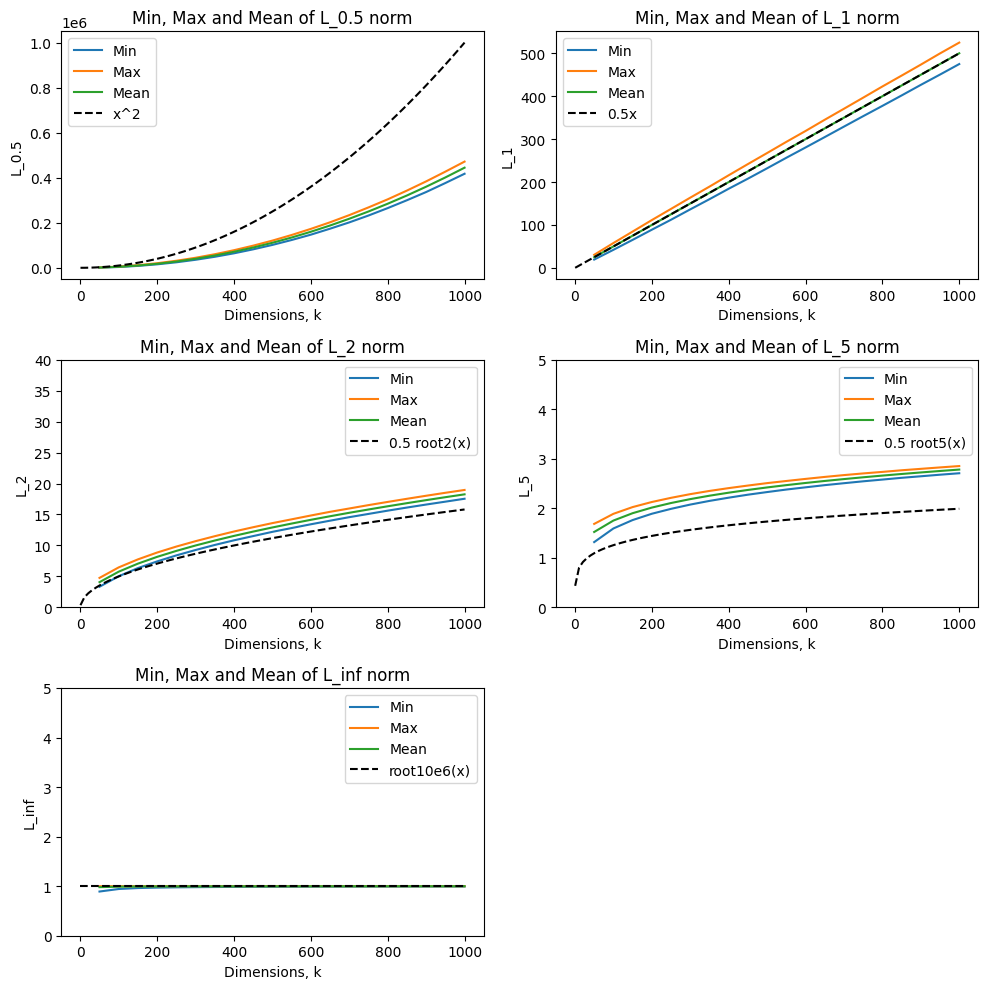

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

graph_indices = [(0, 0), (0,1), (1, 0), (1,1), (2,0)]

for index, p in enumerate(p_list):
    row, column = graph_indices[index]
    axes[row, column].plot(k_list_exp, D_min[p], label="Min")
    axes[row, column].plot(k_list_exp, D_max[p], label="Max" )
    axes[row, column].plot(k_list_exp, D_mean[p], label="Mean")


    print(f"Last value of D_mean of L_{p}: {D_mean[p][-1]}")

    axes[row, column].set_xlabel('Dimensions, k')
    axes[row, column].set_ylabel("L_" + str(p))
    axes[row, column].set_title("Min, Max and Mean of L_" + str(p) + " norm")
    #axes[row, column].legend()



x = np.linspace(0.5, 1000, 100)
axes[0,0].plot(x, x**2, linestyle="--", color='k', label = "x^2")
axes[0,0].legend()

axes[0,1].plot(x, 0.5 * x, linestyle="--", color='k', label = "0.5x")
axes[0,1].legend()

axes[1,0].plot(x, 0.5 * x ** 0.5, linestyle="--", color='k', label = "0.5 root2(x)")
axes[1,0].legend()

axes[1,1].plot(x, 0.5 * x ** 0.2, linestyle="--", color='k', label = "0.5 root5(x)")
axes[1,1].legend()

axes[2,0].plot(x, x ** 0.0000001, linestyle="--", color='k', label = "root10e6(x)")
axes[2,0].legend()

# Same scale for plots of L2, L5 and L∞
axes[1, 0].set_ylim(0, 40)
axes[1, 1].set_ylim(0, 5)
axes[2, 0].set_ylim(0, 5)

# Show the plots
axes[2, 1].axis('off')
plt.tight_layout()
plt.show()

__Conclusions__

The observations are similar to those seen in the original configurations, suggesting that no matter how large $k$, $n$ or $q$ becomes, the $Min(L_p)$, $Max(L_p)$ and $Avg(L_p)$ functions are characterized by the function $ax^{\frac{1}{p}}$.

## **6. Conclusions**

The results clearly demonstrate the effects of the "curse of dimensionality." As the dimensionality $k$ increases, the distances between data points tend to become more uniform across all statistics, leading to a loss of meaningful differentiation between them. This phenomenon is evident from the decreasing relative contrast and the convergence of minimum, maximum, and mean distances. In high-dimensional spaces, data points tend to be equidistant from each other, making traditional distance-based methods, like nearest neighbor search, less effective. This can be seen from the variance graph, when $p>1$, the variance decreases very fast as dimension $k$ grows.

Impact of Curse of dimensionality: When we work with high-dimensional datasets, it is important to apply dimensionality reduction techniques, as they can help mitigate the challenges posed by the curse of dimensionality and preserve the meaningful structure of the data. Particularly, relative contrast is only high when $k \leq 5$ from the graphs above, so it is good strategy that we work with no more than $5$-dimensional data.

## **7. Appendix**

All the code for this exercise has been added with respect to each part for closest referencing. Therefore, we do not attach any more code here in the Appendix section